In [2]:
from langgraph.graph import END, START, StateGraph
from langchain_ollama import ChatOllama
from typing import TypedDict , Annotated , Literal
from pydantic import BaseModel,Field
from langchain_core.messages import SystemMessage, HumanMessage
import operator
from langgraph.checkpoint.memory import InMemorySaver

In [3]:
llm = ChatOllama(model="llama3.2:3b", temperature=0.7)

In [4]:
class JokeState(TypedDict):
    topic: str
    joke: str
    explanation: str

In [5]:
def generate_joke(state:JokeState):

    prompt = f""" 
    Generate a joke about {state['topic']}. 
    """
    response = llm.invoke(prompt)
    state['joke'] = response
    return state

In [6]:
def explain_joke(state:JokeState):
    prompt = f""" 
    Explain the joke {state['joke']}. 
    """
    response = llm.invoke(prompt)
    state['explanation'] = response
    return state

In [9]:
graph = StateGraph(JokeState)

graph.add_node("generate_joke", generate_joke)
graph.add_node("explain_joke", explain_joke)

graph.add_edge(START,"generate_joke")
graph.add_edge("generate_joke", "explain_joke")
graph.add_edge("explain_joke", END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

In [14]:
config1 = {"configurable": {"thread_id": "1"}}
workflow.invoke ({
    "topic": "pizza"
}, config=config1)

{'topic': 'pizza',
 'joke': AIMessage(content='Why did the pizza go to therapy?\n\nBecause it was feeling crusty!', additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2025-11-30T12:55:48.4853266Z', 'done': True, 'done_reason': 'stop', 'total_duration': 3727034400, 'load_duration': 3434844900, 'prompt_eval_count': 35, 'prompt_eval_duration': 43513000, 'eval_count': 16, 'eval_duration': 224133000, 'logprobs': None, 'model_name': 'llama3.2:3b', 'model_provider': 'ollama'}, id='lc_run--11ada263-8eca-4442-91e8-59e238869d83-0', usage_metadata={'input_tokens': 35, 'output_tokens': 16, 'total_tokens': 51}),
 'explanation': AIMessage(content='This is a joke response from a language model, specifically a llama (a type of AI model). The joke is:\n\n"Why did the pizza go to therapy?\nBecause it was feeling crusty!"\n\nThe punchline relies on a play on words. "Crusty" has a double meaning here:\n\n1. In baking, "crust" refers to the outer layer of dough in a pastry or b

In [15]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': AIMessage(content='Why did the pizza go to therapy?\n\nBecause it was feeling crusty!', additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2025-11-30T12:55:48.4853266Z', 'done': True, 'done_reason': 'stop', 'total_duration': 3727034400, 'load_duration': 3434844900, 'prompt_eval_count': 35, 'prompt_eval_duration': 43513000, 'eval_count': 16, 'eval_duration': 224133000, 'logprobs': None, 'model_name': 'llama3.2:3b', 'model_provider': 'ollama'}, id='lc_run--11ada263-8eca-4442-91e8-59e238869d83-0', usage_metadata={'input_tokens': 35, 'output_tokens': 16, 'total_tokens': 51}), 'explanation': AIMessage(content='This is a joke response from a language model, specifically a llama (a type of AI model). The joke is:\n\n"Why did the pizza go to therapy?\nBecause it was feeling crusty!"\n\nThe punchline relies on a play on words. "Crusty" has a double meaning here:\n\n1. In baking, "crust" refers to the outer layer of dou

In [16]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': AIMessage(content='Why did the pizza go to therapy?\n\nBecause it was feeling crusty!', additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2025-11-30T12:55:48.4853266Z', 'done': True, 'done_reason': 'stop', 'total_duration': 3727034400, 'load_duration': 3434844900, 'prompt_eval_count': 35, 'prompt_eval_duration': 43513000, 'eval_count': 16, 'eval_duration': 224133000, 'logprobs': None, 'model_name': 'llama3.2:3b', 'model_provider': 'ollama'}, id='lc_run--11ada263-8eca-4442-91e8-59e238869d83-0', usage_metadata={'input_tokens': 35, 'output_tokens': 16, 'total_tokens': 51}), 'explanation': AIMessage(content='This is a joke response from a language model, specifically a llama (a type of AI model). The joke is:\n\n"Why did the pizza go to therapy?\nBecause it was feeling crusty!"\n\nThe punchline relies on a play on words. "Crusty" has a double meaning here:\n\n1. In baking, "crust" refers to the outer layer of do

In [19]:
config2 = {"configurable":{"thread_id":"2"}}
workflow.invoke({
    "topic": "pasta"
},config=config2)

{'topic': 'pasta',
 'joke': AIMessage(content='Why did the spaghetti refuse to get married?\n\nBecause it was afraid of getting tangled up in a relationship!', additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2025-11-30T12:59:43.6572163Z', 'done': True, 'done_reason': 'stop', 'total_duration': 791847500, 'load_duration': 224681500, 'prompt_eval_count': 35, 'prompt_eval_duration': 223419200, 'eval_count': 22, 'eval_duration': 299409800, 'logprobs': None, 'model_name': 'llama3.2:3b', 'model_provider': 'ollama'}, id='lc_run--1dd49bdf-f1f5-49be-8317-686a07b6c831-0', usage_metadata={'input_tokens': 35, 'output_tokens': 22, 'total_tokens': 57}),
 'explanation': AIMessage(content='This is a response from an AI model, likely a large language model such as LLaMA. The response includes metadata about the model\'s performance and the input and output of the conversation.\n\nThe content of the response is a simple joke:\n\n"Why did the spaghetti refuse to get married

In [20]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'pasta', 'joke': AIMessage(content='Why did the spaghetti refuse to get married?\n\nBecause it was afraid of getting tangled up in a relationship!', additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2025-11-30T12:59:43.6572163Z', 'done': True, 'done_reason': 'stop', 'total_duration': 791847500, 'load_duration': 224681500, 'prompt_eval_count': 35, 'prompt_eval_duration': 223419200, 'eval_count': 22, 'eval_duration': 299409800, 'logprobs': None, 'model_name': 'llama3.2:3b', 'model_provider': 'ollama'}, id='lc_run--1dd49bdf-f1f5-49be-8317-686a07b6c831-0', usage_metadata={'input_tokens': 35, 'output_tokens': 22, 'total_tokens': 57}), 'explanation': AIMessage(content='This is a response from an AI model, likely a large language model such as LLaMA. The response includes metadata about the model\'s performance and the input and output of the conversation.\n\nThe content of the response is a simple joke:\n\n"Why did the spaghetti re

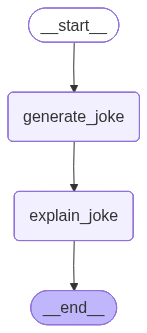

In [8]:
graph.compile()